In [3]:
import pandas as pd
import sqlite3
%matplotlib inline
# Read sqlite query results into a pandas DataFrame

def qry(q, connection = sqlite3.connect("/Users/Brieuc/Documents/DB/8anu-climbing-logbook/database.sqlite")):
    df = pd.read_sql_query(q, connection)
    connection.close
    return df
print (qry("SELECT count(*) FROM ascent"))


   count(*)
0   4111877


In [4]:
query = "SELECT user_id, COUNT(*) as 'climbs', max(B.score) as max_grade FROM "
query += "(SELECT * FROM ascent WHERE user_id in (SELECT id FROM user LIMIT 10)) as A "  
query += "INNER JOIN (SELECT id as grade_id, score, usa_routes FROM grade WHERE score > 0) as B "
query += "on A.grade_id = B.grade_id "
query += "GROUP BY user_id"
qry(query)

,user_id,climbs,max_grade
0,1,210,1000
1,2,7,700
2,3,61,1000
3,4,180,1050
4,5,389,900
5,6,31,1050
6,10,731,1050
7,11,278,1000
8,12,39,1100
9,13,17,500


In [5]:
qry("SELECT * FROM sqlite_master")

,type,name,tbl_name,rootpage,sql
0,table,user,user,2,"CREATE TABLE user (\n\tid INTEGER NOT NULL, \n..."
1,table,method,method,3,"CREATE TABLE method (\n\tid INTEGER NOT NULL, ..."
2,table,grade,grade,4,"CREATE TABLE grade (\n\tid INTEGER NOT NULL, \..."
3,table,ascent,ascent,5,"CREATE TABLE ascent (\n\tid INTEGER NOT NULL, ..."


In [6]:
qry("SELECT (id) FROM user WHERE first_name='B' AND last_name='vds'")

,id
0,48048


In [20]:
# Average Grade climbed by BEL climber

query = "SELECT A.avg, A.number, grade.fra_routes, A.first_name, A.last_name, A.country, A.height, A.weight, A.started FROM "
query += "(SELECT ROUND(avg(grade_id),0) as avg, COUNT(user_id) as number, user.first_name, user.last_name, user.country, user.height, user.weight, user.started "
query += "FROM ascent "
query += "LEFT JOIN user " 
query += "ON ascent.user_id = user.id "
query += "WHERE user.country='BEL' "
query += "GROUP BY user_id "
query += "ORDER BY avg DESC) as A "
query += "LEFT JOIN grade ON A.avg=grade.id "
query += "WHERE avg>37 AND avg<42 "
qry(query)

,avg,number,fra_routes,first_name,last_name,country,height,weight,started
0,41.0,7,6b/+,Nicolas,Daneau,BEL,181,73,1992
1,41.0,1727,6b/+,Tijl,Smitz,BEL,184,73,1999
2,41.0,37,6b/+,Lieven,De Vlaminck,BEL,193,73,2000
3,41.0,47,6b/+,Dirk,Bosmans,BEL,0,0,2000
4,41.0,37,6b/+,Sofie,Van Looy,BEL,0,0,2000
5,41.0,96,6b/+,laurens,geens,BEL,175,68,0
6,41.0,517,6b/+,Edwin,Geyskens,BEL,183,73,2000
7,41.0,100,6b/+,tanguy,vandermeersch,BEL,0,0,2003
8,41.0,2,6b/+,Jonathan,Fusillier,BEL,175,0,2008
9,41.0,239,6b/+,Sascha,Gierlings,BEL,181,88,2009


In [23]:
# Average Grade climbed per country
query = "SELECT A.avg, A.number, grade.fra_routes, A.country FROM "
query += "(SELECT ROUND(avg(grade_id),0) as avg, COUNT(user.country) as number, user.first_name, user.last_name, user.country, user.height, user.weight, user.started "
query += "FROM ascent "
query += "LEFT JOIN user " 
query += "ON ascent.user_id = user.id "
query += "GROUP BY user.country "
query += "ORDER BY number DESC) as A "
query += "LEFT JOIN grade ON A.avg=grade.id "
qry(query)

,avg,number,fra_routes,country
0,48.0,643927,None,USA
1,47.0,517334,6c+/7a,ESP
2,44.0,398794,6c,POL
3,47.0,328015,6c+/7a,DEU
4,49.0,218361,7a,ITA
5,51.0,216577,7a+,FRA
6,43.0,191775,6b+/6c,SWE
7,48.0,167290,None,AUT
8,47.0,148469,6c+/7a,BRA
9,45.0,139800,6c/+,NOR


In [91]:
qry("SELECT * from grade LIMIT 10")

,id,score,fra_routes,fra_routes_input,fra_routes_selector,fra_boulders,fra_boulders_input,fra_boulders_selector,usa_routes,usa_routes_input,usa_routes_selector,usa_boulders,usa_boulders_input,usa_boulders_selector
0,1,0,-,1,1,-,1,1,3/4,1,1,VB,1,1
1,2,0,1,0,0,1,0,0,,0,0,,0,0
2,3,0,1a,0,0,1A,0,0,,0,0,,0,0
3,4,0,1b,0,0,1B,0,0,,0,0,,0,0
4,5,0,1c,0,0,1C,0,0,,0,0,,0,0
5,6,0,1+,0,0,1+,0,0,,0,0,,0,0
6,7,80,2,1,0,2,1,0,5.1,1,0,VB,0,0
7,8,0,2a,0,0,2A,0,0,,0,0,,0,0
8,9,0,2b,0,0,2B,0,0,,0,0,,0,0
9,10,0,2c,0,0,2C,0,0,,0,0,,0,0


In [92]:
data_grade=qry("SELECT id, fra_routes FROM grade ")
data_grade.head().append(data_grade.tail())

,id,fra_routes
0,1,-
1,2,1
2,3,1a
3,4,1b
4,5,1c
78,82,9b+/9c
79,83,9c
80,84,9c/+
81,85,9c+
82,86,9c+/10a


In [82]:
data_fra=data_grade.drop_duplicates(subset='score', keep='last', inplace=False)
print (data_fra)

    score fra_routes
6      80          2
10     90         2+
12    100         3a
14    120         3b
16    140         3c
20    160         4a
22    180         4b
24    200         4c
26      0         4+
28    250         5a
29    275        5a+
30    300         5b
31    325        5b+
32    350         5c
33    375        5c+
35    400         6a
36    425       6a/+
37    450        6a+
38    475     6a+/6b
39    500         6b
40    525       6b/+
41    550        6b+
42    575     6b+/6c
43    600         6c
44    625       6c/+
45    650        6c+
46    675     6c+/7a
47    700         7a
48    725       7a/+
49    750        7a+
..    ...        ...
53    850        7b+
54    875     7b+/7c
55    900         7c
56    925       7c/+
57    950        7c+
58    975     7c+/8a
59   1000         8a
60   1025       8a/+
61   1050        8a+
62   1075     8a+/8b
63   1100         8b
64   1125       8b/+
65   1150        8b+
66   1175     8b+/8c
67   1200         8c
68   1225    

In [44]:
#Script de Kaggle

query = "SELECT user_id, COUNT(*) as 'climbs', avg(B.score) as avg_grade, "
query += "sex, height, weight, date('NOW') - birth as age "
query += "FROM ascent as A "  
query += "INNER JOIN "
query += "(SELECT id as grade_id, score, usa_routes FROM grade WHERE score > 0) as B "
query += "on A.grade_id = B.grade_id "
query += "INNER JOIN (SELECT * FROM user WHERE birth IS NOT NULL AND height > 0 AND weight > 0 AND anonymous = 0 AND deactivated = 0) as C " 
query += "ON A.user_id = C.id "
query += "GROUP BY user_id"
data_in = qry(query)
data_in.head().append(data_in.tail())

,user_id,climbs,avg_grade,sex,height,weight,age
0,1,210,611.333333,0,177,73,42
1,3,61,771.311475,0,180,78,45
2,4,180,803.055556,1,165,58,34
3,6,31,925.806452,0,185,73,48
4,10,731,694.664843,0,167,63,53
16088,67015,2,700.000000,1,145,40,9
16089,67019,8,568.750000,0,172,73,27
16090,67020,17,535.882353,0,178,78,25
16091,67021,16,506.250000,0,180,78,27
16092,67022,1,400.000000,0,185,68,29


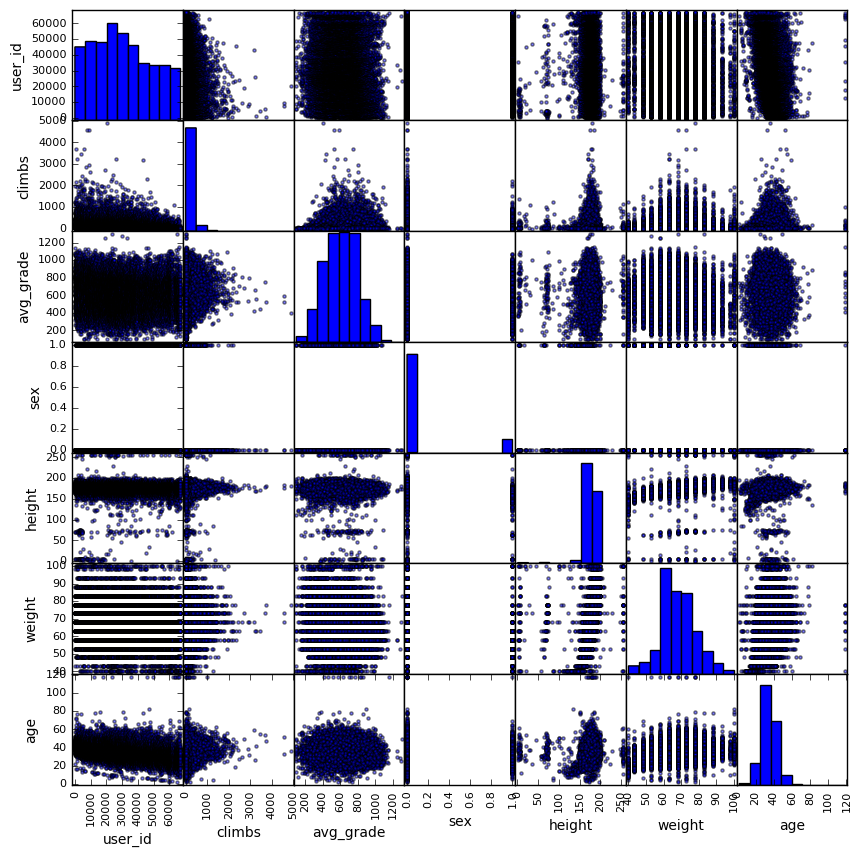

In [45]:
_ = pd.scatter_matrix(data_in,figsize=(10,10))

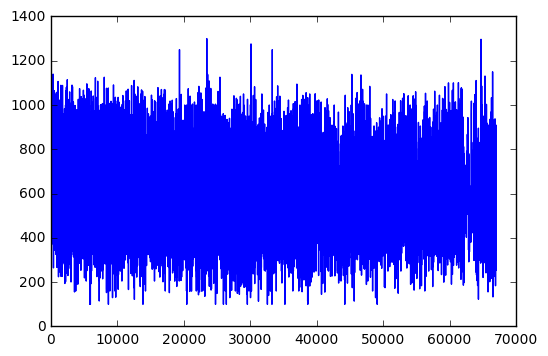

In [47]:
import matplotlib.pyplot as plt
plt.plot(data_in["user_id"], data_in["avg_grade"])
plt.show()

In [103]:
query = "SELECT COUNT(*) as 'climbs', ROUND(avg(B.grade_id),0) as grade, "
query += "sex, height, weight, date('NOW') - birth as age "
query += "FROM ascent as A "  
query += "INNER JOIN "
query += "(SELECT id as grade_id, score FROM grade WHERE grade_id > 0) as B "
query += "on A.grade_id = B.grade_id "
query += "INNER JOIN (SELECT * FROM user WHERE birth IS NOT NULL AND height > 0 AND weight > 0 AND anonymous = 0 AND deactivated = 0) as C " 
query += "ON A.user_id = C.id "
query += "GROUP BY age "
query += "ORDER BY age DESC"
data_in = qry(query)
data_in.head().append(data_in.tail())

,climbs,grade,sex,height,weight,age
0,2759,49.0,0,180,68,118
1,172,57.0,0,135,100,82
2,24,37.0,0,150,100,79
3,10,38.0,0,184,83,78
4,175,47.0,0,179,68,77
72,397,43.0,0,85,40,6
73,832,48.0,0,176,63,5
74,1289,37.0,0,85,40,4
75,89,40.0,0,172,68,3
76,228,44.0,0,173,68,2


In [104]:
data_in.insert(2, 'fra_routes', data_in['grade'].map(data_grade.set_index('id')['fra_routes']))
data_in.head(5)

,climbs,grade,fra_routes,sex,height,weight,age
0,2759,49.0,7a,0,180,68,118
1,172,57.0,7c,0,135,100,82
2,24,37.0,6a/+,0,150,100,79
3,10,38.0,6a+,0,184,83,78
4,175,47.0,6c+/7a,0,179,68,77


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_yticklabels'

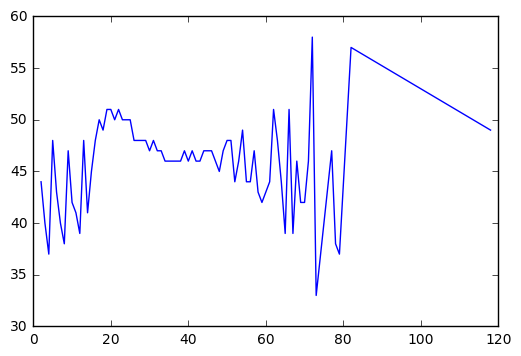

In [109]:
import matplotlib.pyplot as plt
plt.plot(data_in["age"], data_in["grade"])
plt.set_yticklabels(data_in[fra_routes], minor=False, rotation=45)
plt.show()